<a href="https://colab.research.google.com/github/lfnd0/Machine_Learning/blob/master/ML_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de dados sobre câncer de próstata
> Dataset: [Prostate cancer](https://www.kaggle.com/sajidsaifi/prostate-cancer)

## 1. Leitura dos dados

In [166]:
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics  import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import pandas as pd
import matplotlib.pyplot as plt

In [167]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [168]:
data = pd.read_csv('/content/drive/My Drive/Machine_Learning/Datasets/Atividade_2/ca_prostata.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


## 2. Limpeza e organização dos dados

### 2.1 Limpeza dos dados

#### 2.1.1 Remoção da coluna 'id'

In [169]:
data = data.dropna()
data = data.drop(columns = ['id'])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


#### 2.1.2 Mudança dos valores 'B' e 'M' para '0' e '1'

In [170]:
data['diagnosis_result'] = data['diagnosis_result'].replace(['B', 'M'], [0, 1])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


### 2.2 Re-escala dos dados usando máximo e mínimo

In [171]:
data = (data - data.min()) / (data.max() - data.min())
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,1.0,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,1.0,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,1.0,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


### 2.3 Divisão dos dados

#### 2.3.1 Atributos de classe

In [172]:
y = data.diagnosis_result
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: diagnosis_result, dtype: float64

#### 2.3.2 Atributos descritores

In [173]:
x = data.iloc[:, 1:]
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,0.8750,0.0625,0.825000,0.448687,1.000000,0.781759,0.633136,0.590909
1,0.0000,0.1250,0.675000,0.670644,1.000000,0.133550,0.272189,0.090909
2,0.7500,1.0000,0.650000,0.597255,0.753425,0.397394,0.426036,0.159091
3,0.3125,0.3125,0.216667,0.109785,0.000000,0.801303,0.739645,1.000000
4,0.0000,0.5000,0.691667,0.653341,0.972603,0.309446,0.272189,0.136364


#### 2.3.3 Conjunto de treino e conjunto de teste

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2)

In [175]:
x_train.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
69,0.5000,0.6250,0.241667,0.179594,0.383562,0.045603,0.142012,0.090909
17,0.3750,0.1875,0.466667,0.356205,0.643836,0.534202,0.479290,0.477273
42,0.1250,0.0000,0.633333,0.538186,0.287671,0.589577,0.568047,0.227273
64,0.4375,0.5000,0.258333,0.177208,0.575342,0.286645,0.331361,0.295455
71,0.0000,0.9375,0.058333,0.025060,0.383562,0.374593,0.325444,0.840909


In [176]:
y_train.head()

69    0.0
17    1.0
42    1.0
64    1.0
71    0.0
Name: diagnosis_result, dtype: float64

## 3. Treinamentos

### 3.1 Árvore de decisão

#### 3.1.1 Criando a Árvore de decisão

In [177]:
sorter = DecisionTreeClassifier()
sorter.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

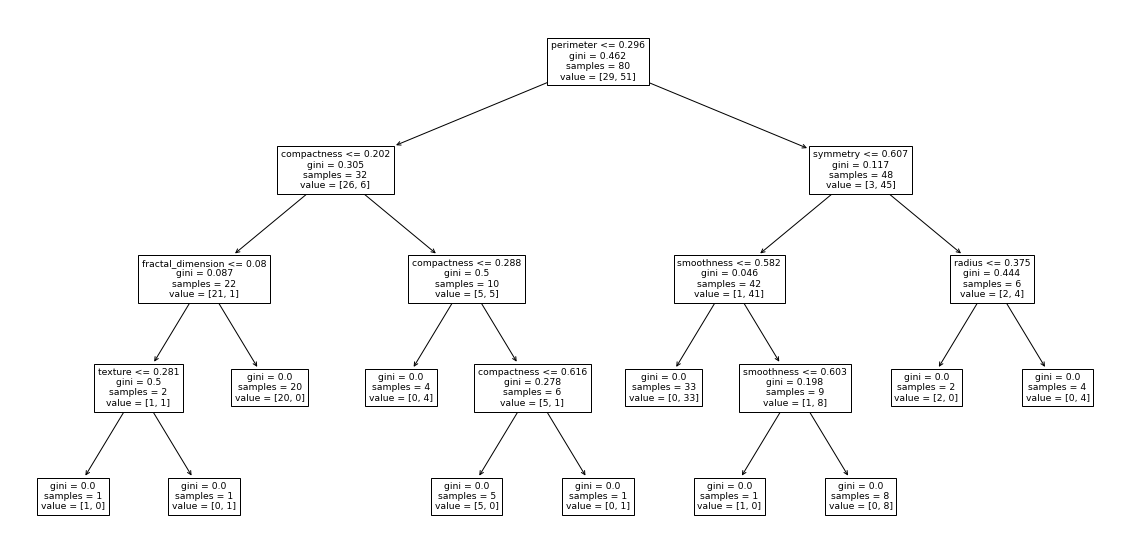

In [178]:
plt.rcParams['figure.figsize'] = (20, 10)
plot_tree(sorter, feature_names = data.columns[1:])
plt.show()

#### 3.1.2 Comparando as saídas

In [179]:
rating = sorter.predict(x_test)

for i in range(len(y_test)):
    print(y_test.iloc[i], '\t', rating[i])

0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0


#### 3.1.3 Acurácia

In [180]:
acuracia = accuracy_score(y_test, rating)
acuracia

0.75

#### 3.1.4 Precisão

In [181]:
precisao = precision_score(y_test, rating)
precisao

0.8

#### 3.1.5 Recall

In [182]:
recall = recall_score(y_test, rating)
recall

0.7272727272727273

#### 3.1.6 F1-score

In [183]:
f_1_score = f1_score(y_test, rating)
f_1_score

0.761904761904762

#### 3.1.7 Curva ROC

Text(0, 0.5, 'Taxa de verdadeiros positivos')

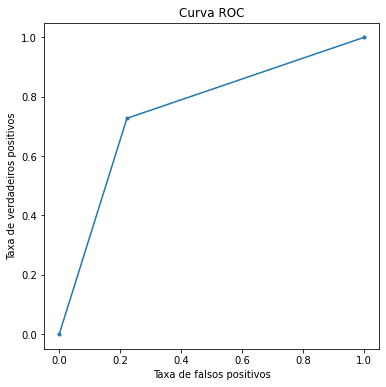

In [184]:
plt.figure(figsize = (6, 6))
fpr, tpr, _ = roc_curve(y_test, rating)
plt.plot(fpr, tpr, marker = '.')
plt.title('Curva ROC')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')

#### 3.1.8 Área abaixo da curva (*Area under the curve* – AUC)

In [185]:
error_ad = roc_auc_score(y_test, rating)
error_ad

0.7525252525252525

### 3.2 *Random forest*

#### 3.2.1 Criando a *Random forest*

In [186]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 3.2.2 Acurácia

In [187]:
forest.score(x_test, y_test)

0.75

#### 3.2.3 Previsão

In [188]:
prevision = forest.predict(x_test)
prevision

array([0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1.])

#### 3.2.4 Curva ROC

Text(0, 0.5, 'Taxa de verdadeiros positivos')

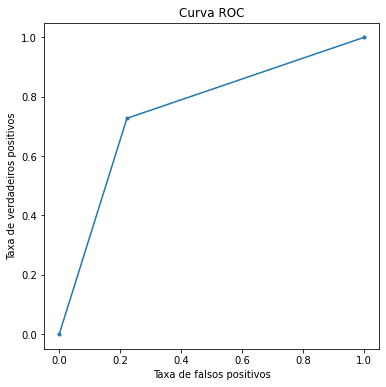

In [189]:
plt.figure(figsize = (6, 6))
fpr_fo, tpr_fo, _ = roc_curve(y_test, prevision)
plt.plot(fpr_fo, tpr_fo, marker = '.')
plt.title('Curva ROC')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')

#### 3.2.5 Área abaixo da curva (*Area under the curve* – AUC)

In [190]:
error_fo = roc_auc_score(y_test, prevision)
error_fo

0.7525252525252525

## 4. Árvore de decisão 'vs' *Random forest*

### 4.1 Método holdout

#### 4.1.1 Árvore de decisão

In [191]:
decision_t = DecisionTreeClassifier()
decision_t.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [192]:
decision_t.score(x_test, y_test)

0.7

#### 4.1.2 *Random forest*

In [193]:
random_f = RandomForestClassifier(n_estimators=100)
random_f.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [194]:
random_f.score(x_test, y_test)

0.75

#### 4.1.3 Curva ROC

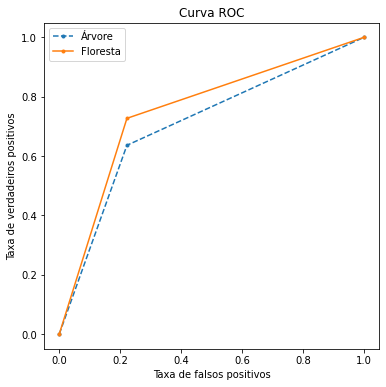

In [195]:
clf_tree = decision_t.predict(x_test)
clf_forest = random_f.predict(x_test)

fpr_tree, tpr_tree, _ = roc_curve(y_test, clf_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, clf_forest)

plt.figure(figsize = (6, 6))
plt.plot(fpr_tree, tpr_tree, linestyle = '--', marker = '.', label = 'Árvore')
plt.plot(fpr_forest, tpr_forest, marker = '.', label = 'Floresta')
plt.title('Curva ROC')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.legend()
plt.show()

### 4.2 Validação cruzada

#### 4.2.1 Árvore de decisão

In [196]:
score_tree = cross_val_score(decision_t, x, y, cv = 10)
round(score_tree.mean(), 3), round(score_tree.std(), 3)

(0.79, 0.17)

#### 4.2.2 *Random forest*

In [197]:
score_forest = cross_val_score(random_f, x, y, cv = 10)
round(score_forest.mean(), 3), round(score_forest.std(), 3)

(0.83, 0.162)

## 5. Considerações

Diante dos valores obtidos com a abordagem da Árvore de decisão e da *Random forest*, pôde-se obervar que a *Random Forest* obtive um resultado mais próximo do eixo da 'Taxa de verdadeiros positivos'. Embora todos os treinos obtiveram *score* entre ~70% e ~80%, para acertos na classificação.